In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [17]:
import pandas as pd 

df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# check missing value
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df['Age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [21]:
# mengisi missing value dengan median Karena usia bisa memiliki outlier 
df['Age'].fillna(df['Age'].mean(), inplace=True)


In [22]:
df['Cabin'].mode()[0]

'B96 B98'

Karna kolom kabin memilik 2 mode yang jumlah nya sama maka di ambil salah satu nya saja

In [23]:
# Pisahkan nilai 'B96 B98' menjadi dua nilai terpisah
df['Cabin'] = df['Cabin'].str.split()  # Memisahkan berdasarkan spasi

# Explode list menjadi baris terpisah
df_exploded = df.explode('Cabin')

# Filter hanya nilai 'B96' dan 'B98'
b96_b98_counts = df_exploded[df_exploded['Cabin'].isin(['B96', 'B98'])]['Cabin'].value_counts()

print(b96_b98_counts)

Cabin
B96    4
B98    4
Name: count, dtype: int64


In [26]:
# Isi missing value dengan B96
df['Cabin'].fillna('B96', inplace=True)



C:\Users\nabil\AppData\Local\Temp\ipykernel_31040\2077710207.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('B96', inplace=True)


In [28]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\nabil\AppData\Local\Temp\ipykernel_31040\411043493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [29]:
# check missing value
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [35]:
df['Cabin']

0       B96
1       C85
2       B96
3      C123
4       B96
       ... 
886     B96
887     B42
888     B96
889    C148
890     B96
Name: Cabin, Length: 891, dtype: object

In [34]:
df['Cabin'] = df['Cabin'].fillna('B96').astype(str).str.replace(r'[\[\]\']', '', regex=True)


In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [46]:
df['Cabin'].head(50)

0               B96
1               C85
2               B96
3              C123
4               B96
5               B96
6               E46
7               B96
8               B96
9               B96
10               G6
11             C103
12              B96
13              B96
14              B96
15              B96
16              B96
17              B96
18              B96
19              B96
20              B96
21              D56
22              B96
23               A6
24              B96
25              B96
26              B96
27    C23, C25, C27
28              B96
29              B96
30              B96
31              B78
32              B96
33              B96
34              B96
35              B96
36              B96
37              B96
38              B96
39              B96
40              B96
41              B96
42              B96
43              B96
44              B96
45              B96
46              B96
47              B96
48              B96
49              B96


In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male → 1, female → 0

# Encode 'Embarked' (C, Q, S → 0, 1, 2)
df['Embarked'] = le.fit_transform(df['Embarked'])

print(df[['Sex', 'Embarked']].head())


   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


In [41]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,B96,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,B96,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,B96,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,B96,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,B96,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0


In [48]:
df[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Berati asumsikan bahwa passanger class 1 memiliki tingkat selamat yang cukup tinggi 

Text(0.5, 1.0, 'Survival Probability by PClass')

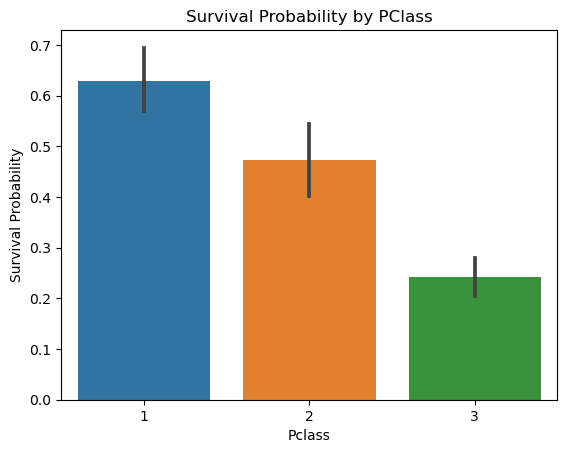

In [53]:
sns.barplot(x = 'Pclass', y ='Survived', data = df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by PClass')


Text(0.5, 1.0, 'Survival Probability by Gender')

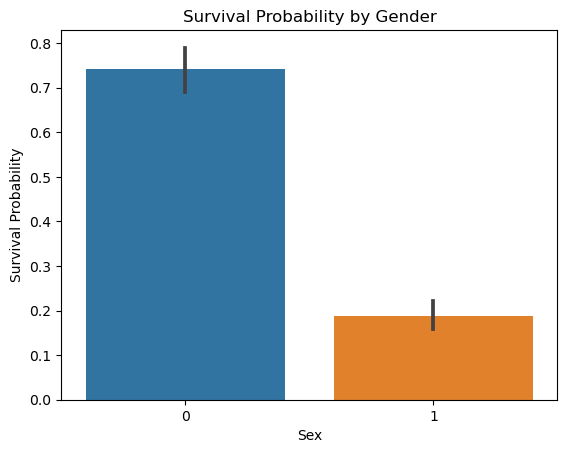

In [ ]:
sns.barplot(x = 'Sex', y ='Survived', data = df)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')


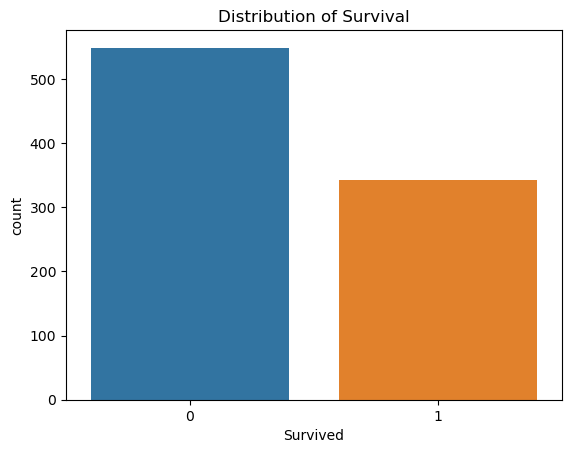

In [36]:
# membuat plot untuk melihat distribusi survival 
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.show()

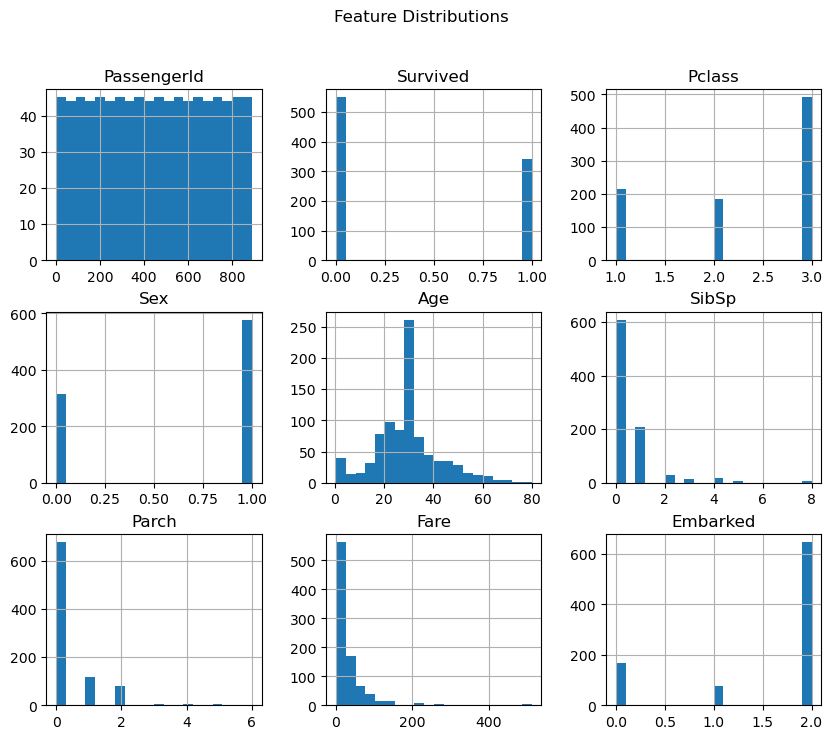

In [49]:

# Visualisasi distribusi numerik
df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Feature Distributions')
plt.show()



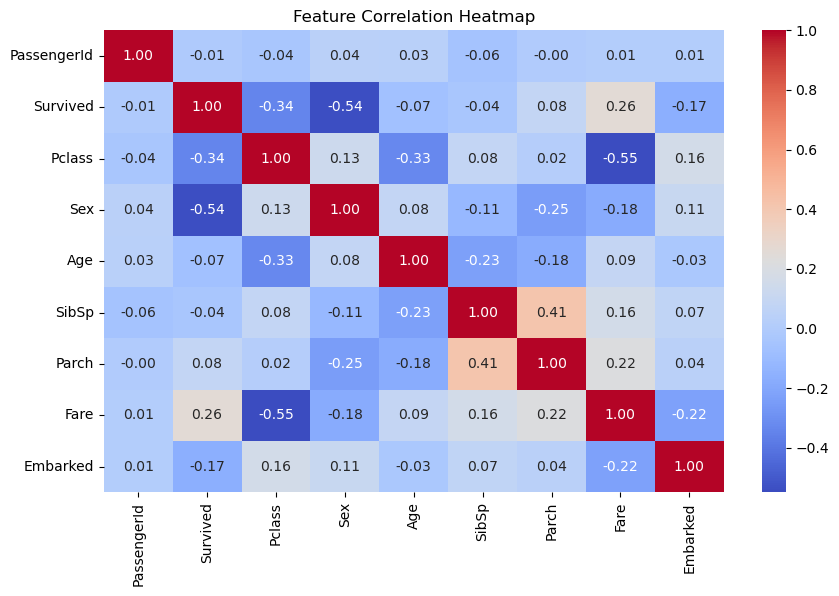

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


Membuat df baru untuk memilih Fitur dan membuang informasi yang tidak berguna seperti 
nama,id,ongkos,tiket,kedatangan/pelabuhan 

In [57]:
# Feature Selection & Preprocessing
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df = df[selected_features + ['Survived']]

In [58]:
# Define features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
# Inisialisasi dan latih model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [79]:
# Prediksi pada test set
y_pred = model.predict(X_test)

In [80]:

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [81]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[140  17]
 [ 29  82]]

Accuracy: 0.8283582089552238

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       157
           1       0.83      0.74      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



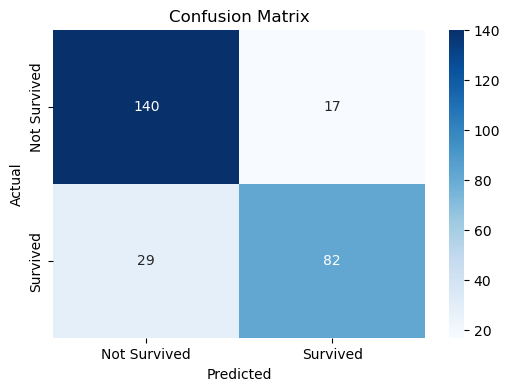

In [83]:
# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# Evaluasi dengan cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')

Cross-Validation Accuracy: 0.7833


In [ ]:
param_grid = {
    'C': np.logspace(-4, 2, 30),
    'solver': ['liblinear', 'lbfgs', 'newton-cg']
}


Setelah di tunning model Mengalami overfit , maka akurasinya menurun

In [87]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {'C': loguniform(0.0001, 100), 'solver': ['lbfgs', 'liblinear']}


from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=200, cv=skf, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)

print("Best parameters found:", random_search.best_params_)
print("Best cross-validation accuracy:", random_search.best_score_)


Best parameters found: {'C': 0.06317967091932514, 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.7992129032258065


In [89]:
import joblib

# Simpan model terbaik ke dalam file
joblib.dump(model, "logistic_regression_model.pkl")
print("Model saved successfully!")

# Load model kembali (jika ingin menggunakannya di lain waktu)
loaded_model = joblib.load("logistic_regression_model.pkl")
print("Model loaded successfully!")

# Prediksi pada data test
y_test_pred = loaded_model.predict(X_test)

Model saved successfully!
Model loaded successfully!
